# Notebook d'aide/correction pour la séance EPU MAM4 Biomaths (suite 3)

*séance du 21/03/2022*

*Ludovic Mailleret, Mars 2022*

## Populations en interaction : le modèle proies-prédateurs de Lotka et Volterra

### Dynamiques et plan de phase

Nous considérons le modèle de dynamique de populations (classique) de Lotka et Volterra

$$
\left\{\begin{array}{l}
\dot x = rx - c xy\\
\dot y = bxy - m y
\end{array}\right.
$$

Il n'y a pas de difficulté particulière à la simulation par rapport au modèle de la tordeuse du bourgeon de l'épinette avec population d'oiseaux variables.

In [1]:
# on nettoie l'espace de travail et on reload les modules
%reset -f

import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint


# script de simulation 
# densités initiales des populations
x0 = 1
y0 = 2.5

# encapsulation de la densité initiale
etat0_LV = np.array([x0, y0])

# définition d'un vecteur tspan pour tracer E_varie()
t_0 = 0             # temps initial
t_fin = 30.0        # temps final, ici on prend un temps final long pour observer les dynamiques lentes
pas_t = 0.01        # pas de temps de récupération des variables entre t_0 et t_fin

# définition du tspan 
tspan = np.arange(t_0, t_fin, pas_t)

# paramètres du modèle
r = 1.0
c = 1.0
b = 1.0
m = 1.0

# encapsulation des paramètres dans un array
params_LV = np.array([r, c, b, m])


# définition du modèle de Lotka Volterra
def modele_LV(etat, t, params):
    x, y = etat                               # recupere les variables d'etat
    r, c, b, m = params               # recupere les parametres 
    etatdot = [r*x - c*x*y,     # dot x
               b*x*y - m*y]       # dot y
    return etatdot                                      # renvoie la derivee


# simulation proprement dite
int_LV = odeint(modele_LV, etat0_LV, tspan, args=(params_LV,), hmax=pas_t)

A priori, tout est OK:

In [2]:
int_LV

array([[1.        , 2.5       ],
       [0.98511256, 2.4998135 ],
       [0.97045034, 2.4992576 ],
       ...,
       [0.30945175, 0.61472634],
       [0.31065286, 0.61049964],
       [0.31187176, 0.60630933]])

Nous pouvons passer à la représentation graphique, d'abord en fonction du temps:

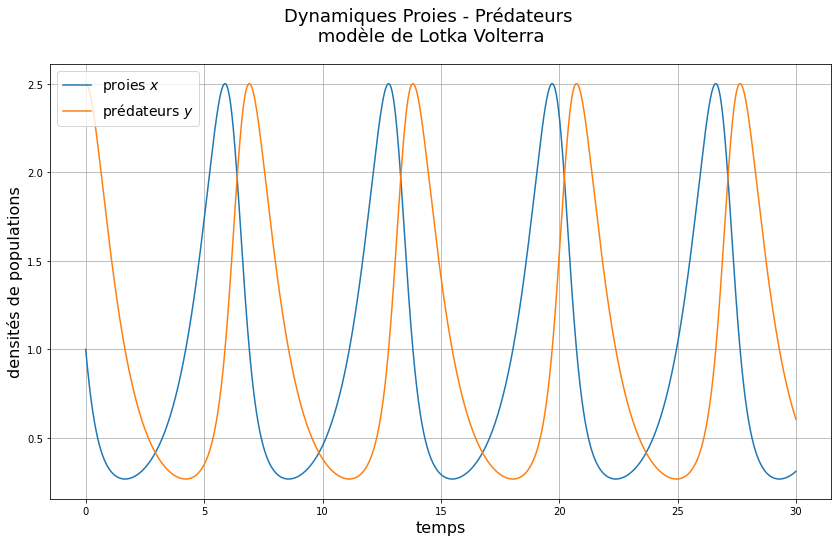

In [3]:
# création d'une figure, et d'un système d'axe
fig1, ax1 = plt.subplots(1, 1, figsize=(14, 8))  

# titre de la figure
fig1.suptitle("Dynamiques Proies - Prédateurs\n modèle de Lotka Volterra", va='top', fontsize='18')

# tracé de x et y contre le temps
ax1.plot(tspan, int_LV[:, 0], color = 'C0', label = "proies $x$")
ax1.plot(tspan, int_LV[:, 1], color = 'C1', label = "prédateurs $y$")

# labellisation des axes
ax1.set_xlabel('temps', fontsize='16')
ax1.set_ylabel('densités de populations', fontsize='16')

# légende
ax1.legend(fontsize='14')

# modification éventuelle des bornes des axes
ax1.set_ylim(bottom=None, top=None)

# ajout d'une grille
ax1.grid()

Il est intéressant aussi de représenter les trajectoires dans l'espace d'état $(x,y)$, en combinaison avec une analyse qualitative du plan de phase (isoclines nulles, équilibres), une représentation du champs de vecteurs et de quelques morceaux de trajectoires sur le plan.

Commençons par calculer les isoclines nulles et les équilibres.

In [4]:
# array annexes pour le calcul et la représentation des isoclines nulles
xplot = np.arange(0, 3, .1)  
yplot = np.arange(0, 3, .1)

# isoclines nulles de xdot
null_x_x = np.zeros_like(yplot)        # x = 0 isocline nulle de xdot
null_x_y = np.ones_like(xplot)*(r/c)   # y = r/c isocline nulle de xdot

# isoclines nulles de ydot
null_y_y = np.zeros_like(xplot)        # y = 0 isocline nulle de ydot
null_y_x = np.ones_like(yplot)*(m/b)   # x = m/b isocline nulle de ydot

# équilibres
eq_extinct = [0, 0]
eq_coex = [r/c, m/b]

Puis on commence à tracer le plan de phase:

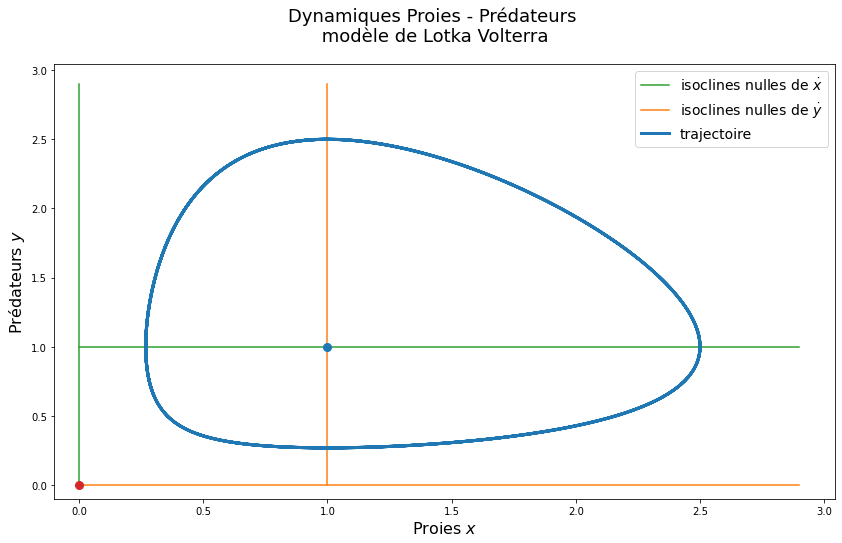

In [5]:
# création d'une figure, et d'un système d'axe
fig2, ax2 = plt.subplots(1, 1, figsize=(14, 8))  

# titre de la figure
fig2.suptitle("Dynamiques Proies - Prédateurs\n modèle de Lotka Volterra", va='top', fontsize='18')

# tracé des isoclines nulles, des équilibres, et de la trajectoire simulée
# isoclines nulles de x
ax2.plot(null_x_x, yplot, color = 'C2')
ax2.plot(xplot, null_x_y, color = 'C2', label = "isoclines nulles de $\dot x$")
# isoclines nulles de y
ax2.plot(xplot, null_y_y, color = 'C1')
ax2.plot(null_y_x, yplot, color = 'C1', label = "isoclines nulles de $\dot y$")

# équilibres
ax2.plot(eq_extinct[0], eq_extinct[1], marker ='.', color = 'C3', markersize = 16)
ax2.plot(eq_coex[0], eq_coex[1], marker ='.', color = 'C0', markersize = 16)
# trajectoires
ax2.plot(int_LV[:, 0], int_LV[:, 1], color = 'C0', linewidth = 3, label = "trajectoire")

# labellisation des axes
ax2.set_xlabel('Proies $x$', fontsize='16')
ax2.set_ylabel('Prédateurs $y$', fontsize='16')

# légende
ax2.legend(fontsize='14', loc = "upper right")

# modification éventuelle des bornes des axes
ax2.set_ylim(bottom=-.1, top=None)
ax2.set_xlim(left=-.1, right=None);

Il est intéressant (et joli) de surimposer sur cette figure une représentation du champs de vecteur et quelques idées de trajectoire.

Pour cela il nous faut définir une grille de valeurs dans le plan $(x,y)$ et utiliser la méthode `quiver()` des systèmes d'axes (champs de vecteurs) et la méthode `streamplot()` (échantillons de trajectoires).

La définition de la grille se fait par la fonction `meshgrid()` de `numpy` sur la base d'`array` définissant l'amplitude et le pas des variations de $x$ et $y$.


In [6]:
# définition de l'échantillonnage selon $x$ et $y$
x_grid = np.linspace(0.1, 3.0, 10)   # au passage on change un peu de np.arange()
y_grid = np.linspace(0.1, 3.0, 10)

# grille X,Y selon x_grid et y_grid
X, Y = np.meshgrid(x_grid, y_grid)

On calcule ensuite les valeurs des dérivées $\dot x$ et $\dot y$ sur cette grille:

In [7]:
# dérivées dot_x et dot_y sur la grille
dx, dy = modele_LV([X, Y], 0, params_LV)

A partir de là on peut tracer le champs de vecteur et l'échantillon de trajectoires dans le système d'axes `ax2`:

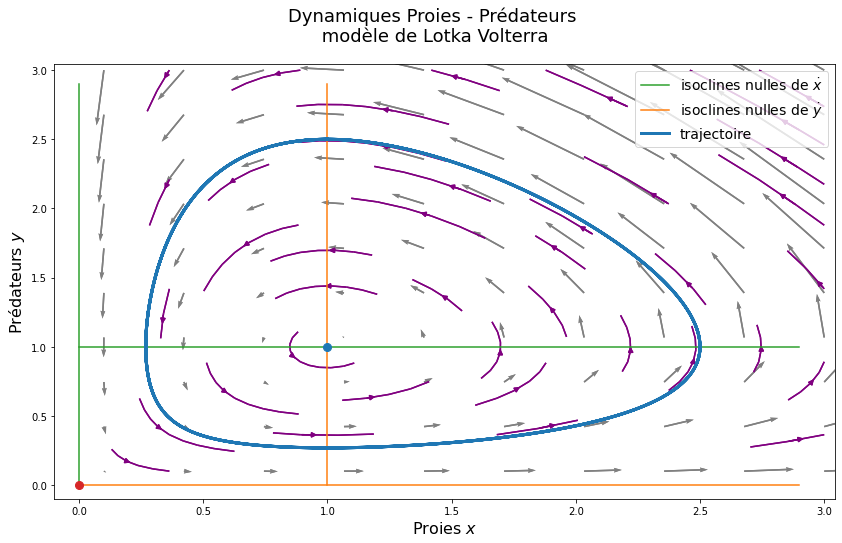

In [9]:
# tracé du champs de vecteurs
# Attention à l'option angles ='xy' les fleches sont tracees avec orientation en unité naturelle de l'ecran 
# et pas en unité naturelle de la figure
ax2.quiver(X, Y, dx, dy, angles = 'xy', color = 'grey', width = .002)

# tracé des échantillons de trajectoires
ax2.streamplot(X, Y, dx, dy, density = 0.4, maxlength = 0.25, color = "purple")

# on réaffiche la figure
display(fig2)


### Intégrale première 

Finalement, nous représentons l'intégrale première de ce système. 

In [10]:
# définition de la fonction conservée au cours du temps dans le modèle de Lotka Volterra
def int_premiere(etat, params):
    x, y = etat                               # recupere les variables d'etat
    r_l, c_l, b_l, m_l = params               # recupere les parametres 
    H_xy = -r_l*np.log(y) + c_l*y - m_l*np.log(x) + b_l*x  # calcule la valeur de la fonction
    return H_xy

On peut vérifier la constance de cette quantité au cours du temps:

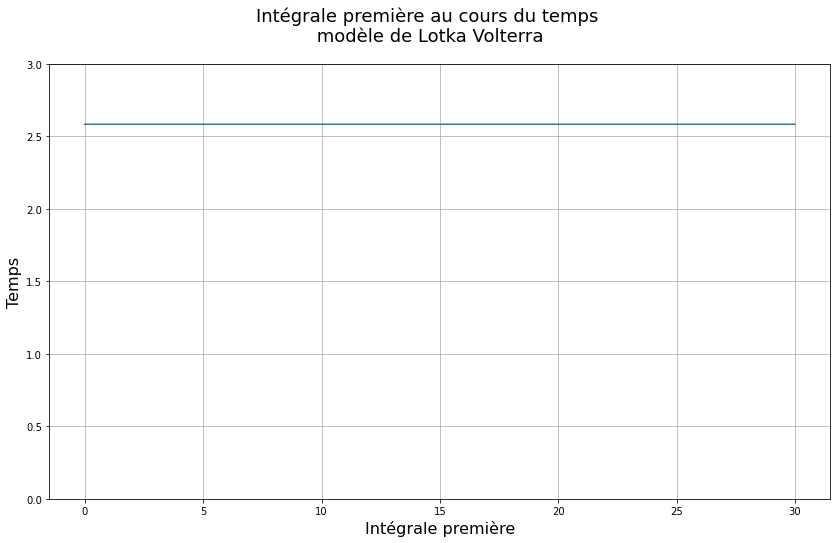

In [11]:
# création d'une figure, et d'un système d'axe
fig3, ax3 = plt.subplots(1, 1, figsize=(14, 8))  

# titre de la figure
fig3.suptitle("Intégrale première au cours du temps\n modèle de Lotka Volterra", va='top', fontsize='18')

# tracé des isoclines nulles, des équilibres, et de la trajectoire simulée
# isoclines nulles de x
ax3.plot(tspan, int_premiere([int_LV[:,0], int_LV[:,1]], params_LV))

# limites des axes
ax3.set_ylim(bottom=0, top=3)

# labellisation des axes
ax3.set_xlabel('Intégrale première', fontsize='16')
ax3.set_ylabel('Temps', fontsize='16')

# ajout d'une grille
ax3.grid()

Et finalement représenter ces quantités en 3D, en fonction des valeurs de $x$ et $y$. Pour cela nous utilisons une grille, comme plus haut pour le plan de phase, et evaluons la fonction sur cette grille.

In [12]:
# définition de l'échantillonnage selon $x$ et $y$
x_grid = np.linspace(0.15, 3.0, 30)   # au passage on change un peu de np.arange()
y_grid = np.linspace(0.15, 3.0, 30)

# grille X,Y selon x_grid et y_grid
X, Y = np.meshgrid(x_grid, y_grid)

# calcul de la fonction conservee sur la grille
int_premiere_grid = int_premiere([X, Y], params_LV)

Nous créons une figure avec des paramètres adequats pour un graphique 3D et tracons la fonction en fonction des valeurs de $x$ et $y$ sur la grille.

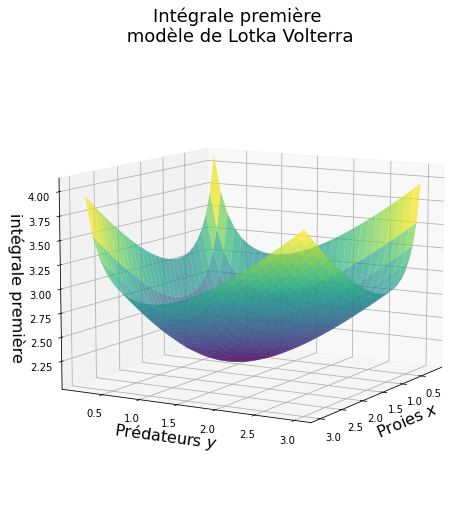

In [13]:
# création d'une figure, et d'un système d'axe un peu particulier puisqu'il est en 3D
fig4, ax4 = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(14, 8))  

# nous importons des colormaps pour représenter la fonction integrale_premiere
from matplotlib import cm

# nous tracons l'integrale première sur la grille
ax4.plot_surface(X, Y, int_premiere_grid, cmap=cm.viridis, antialiased=True, alpha =.7)

# réglage de l'angle de vision en fonction de l'élévation et de l'azimut
ax4.view_init(elev=10, azim= 30)

# labellisation des axes
ax4.set_xlabel('Proies $x$', fontsize='16')
ax4.set_ylabel('Prédateurs $y$', fontsize='16')
ax4.set_zlabel("intégrale première", fontsize='16')

# titre de la figure
fig4.suptitle("Intégrale première\n modèle de Lotka Volterra", va='top', fontsize='18');

Puis nous surimposons le plan correspondant à la valeur initiale de l'intégrale première en fonction de $x$ et $y$, ainsi que l'évolution de cette quantité au cours du temps le long de la trajectoire simulée.

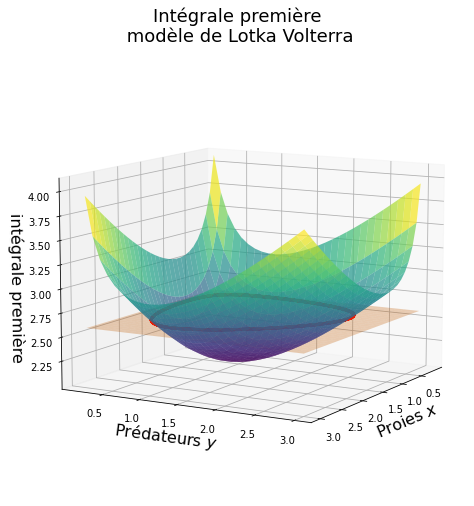

In [14]:
# tracé du plan correspondant a la valeur initiale de l'intégrale première
ax4.plot_surface(X, Y, np.ones_like(int_premiere_grid)*int_premiere([x0, y0], params_LV), 
                 antialiased=True, alpha =.3)

# tracé de la valeur de l'intégrale première le long de la trajectoire simulée
ax4.plot(int_LV[:,0], int_LV[:,1], int_premiere([int_LV[:,0], int_LV[:,1]], params_LV), 
         color = "red", linewidth = 3)

# affichage de la figure 4
display(fig4)

Pour la suite sur le modèle proies-prédateurs de Rosenzweig - MacArthur, c'est par [ici](./biomaths_mam4_RMA.ipynb)